# Capstone - FEMA Hazard Mitigation Regression Analysis

**By Rachel Beery**

**For my capstone I want to study community resilency and predict hazard mitigation success. I will be using the OpenFEMA datasets. My project will use supervised learning linear regression modeling to predict hazard mitigation success.**

**In this project we are using a regression analysis model to understand the ROI of hazard mitigation costs in USD. By understanding these patterns we will then provide recommendations on how to better allocate hazard mitigation funds in the future.**

Source: https://www.fema.gov/about/openfema/data-sets

### Goals: 
- Make a logistic regression to see what features yield the highest ROI in recovery funding. 

# Data Exploration and Cleaning

In [2]:
# We will begin by importing all of the packages we anticipate to use
import pandas as pd
import pandas.tseries  
import numpy as np  

import statsmodels.api as sm 
import itertools

import matplotlib.pyplot as plt   
from matplotlib.pylab import rcParams 
%matplotlib inline
import matplotlib.ticker as mtick
plt.style.use('ggplot') 
import plotly.express as px
import plotly.figure_factory as ff 
import plotly.graph_objects as go 
import seaborn as sns  

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore') 

import math
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
# CV - why not importing

from sklearn.feature_selection import VarianceThreshold, SelectFromModel
linreg = LinearRegression()

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [3]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows',)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
#Import data and see the headers
df = pd.read_csv(r"HazardMitigationAssistanceProjects - HazardMitigationAssistanceProjects.csv")
df.head()

region  stateNumberCode  ...               lastRefresh                        id
0       6               48  ...  2020-09-17T18:15:38.772Z  5f63a7ca31a8c6681c9dfd79
1       5               18  ...  2020-09-17T18:15:38.771Z  5f63a7ca31a8c6681c9dfd81
2       7               19  ...  2020-09-17T18:15:38.772Z  5f63a7ca31a8c6681c9dfd84
3       2               36  ...  2021-01-19T17:38:38.392Z  5f63a7ca31a8c6681c9dfd87
4       7               19  ...  2020-09-17T18:15:38.772Z  5f63a7ca31a8c6681c9dfd88

[5 rows x 30 columns]

In [5]:
# How big is this dataset?
df.shape

(29628, 30)

In [6]:
# Looking to make sure out df is the correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 30 columns):
region                       29628 non-null int64
stateNumberCode              29628 non-null int64
state                        29628 non-null object
countyCode                   27586 non-null float64
county                       27586 non-null object
programArea                  29628 non-null object
projectIdentifier            29628 non-null object
projectType                  29301 non-null object
projectTitle                 29450 non-null object
projectCounties              27859 non-null object
numberOfProperties           29628 non-null int64
numberOfFinalProperties      29628 non-null int64
status                       29628 non-null object
subgrantee                   29133 non-null object
costSharePercentage          29608 non-null float64
projectAmount                29608 non-null float64
federalShareObligated        29628 non-null float64
programFy               

In [7]:
df.drop(axis=1, columns=['subgranteeTribalIndicator', 'lastRefresh', 
                         'dateInitiallyApproved', 'dateApproved', 
                         'dateClosed', 'projectTitle', 'numberOfFinalProperties', 'subgrantee', 
                         'projectIdentifier', 'projectCounties', 'numberOfProperties',
                        'status', 'costSharePercentage', 'federalShareObligated', 'grantee', 
                         'disasterNumber', 'hash', 'id', 
                         'state','county', 'countyCode', 'projectType'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 8 columns):
region                    29628 non-null int64
stateNumberCode           29628 non-null int64
programArea               29628 non-null object
projectAmount             29608 non-null float64
programFy                 29628 non-null int64
granteeTribalIndicator    22692 non-null float64
benefitCostRatio          29628 non-null float64
netValueBenefits          24707 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.8+ MB


In [8]:
df.describe()

region  stateNumberCode  ...  benefitCostRatio  netValueBenefits
count 29628.000        29628.000  ...         29628.000         24707.000
mean      5.170           27.841  ...           171.556       9907805.571
std       2.420           17.182  ...         20368.674     808951961.855
min       1.000            1.000  ...             0.000             0.000
25%       4.000           12.000  ...             0.000             0.000
50%       5.000           27.000  ...             0.847        103985.000
75%       7.000           40.000  ...             1.666        950061.000
max      10.000           78.000  ...       2479069.620   89843962103.000

[8 rows x 7 columns]

In [9]:
# Bining the benefitCostRatio to be if above 1 or below 1 
df['Positive_ROI']=(df['benefitCostRatio']>=1).astype(int)
df['Positive_ROI']

0        1
1        1
2        0
3        0
4        0
        ..
29623    1
29624    0
29625    1
29626    0
29627    0
Name: Positive_ROI, Length: 29628, dtype: int32

In [10]:
df.head()
# Now we have the Positive_ROI column

region  stateNumberCode  ... netValueBenefits  Positive_ROI
0       6               48  ...      2969310.000             1
1       5               18  ...       961452.000             1
2       7               19  ...            0.000             0
3       2               36  ...            0.000             0
4       7               19  ...            0.000             0

[5 rows x 9 columns]

In [11]:
df['Positive_ROI'].value_counts(normalize=True)

0   0.506
1   0.494
Name: Positive_ROI, dtype: float64

In [12]:
# Split the data into target and predictors
#y = df['Positive_ROI']
#X = df.drop(columns=['Positive_ROI'], axis=1)

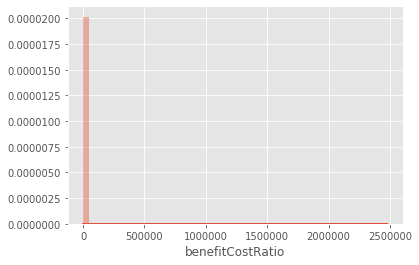

In [13]:
sns.distplot(df['benefitCostRatio'])

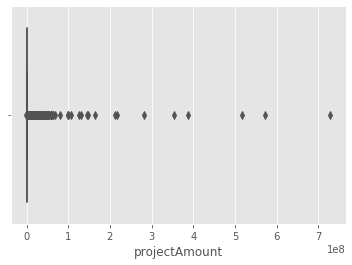

In [14]:
# Looks like projectAmount has outliers - Let's plot it
sns.boxplot(x=df['projectAmount'])

In [15]:
df['projectAmount'].sum()

24154158163.54

In [16]:
df['projectAmount'].median()

114895.5

In [17]:
# Do we have nulls?
df.isna().sum()

region                       0
stateNumberCode              0
programArea                  0
projectAmount               20
programFy                    0
granteeTribalIndicator    6936
benefitCostRatio             0
netValueBenefits          4921
Positive_ROI                 0
dtype: int64

In [18]:
df['projectAmount'].fillna(0.0, axis = 0, inplace=True)
df['projectAmount'].value_counts()

40000.000      186
50000.000      184
100000.000     139
20000.000      120
25000.000      119
              ... 
1252647.000      1
840671.000       1
40254.000        1
31066.670        1
573403.000       1
Name: projectAmount, Length: 24108, dtype: int64

In [19]:
df['netValueBenefits'].fillna(0.0, axis = 0, inplace=True)
df['netValueBenefits'].value_counts()

0.000          14662
21420.000        318
1.000            152
276000.000        96
175000.000        36
               ...  
775151.000         1
387575.000         1
1222617.000        1
3624869.000        1
16552.000          1
Name: netValueBenefits, Length: 13097, dtype: int64

In [20]:
df[(df['projectAmount']<0)]

region  stateNumberCode  ... netValueBenefits  Positive_ROI
3795        5               27  ...            0.000             0
6134        1               25  ...            0.000             0
22833       5               26  ...            0.000             0

[3 rows x 9 columns]

In [21]:
# The outliers need to be addressed
df = df[(df['projectAmount']>0)]

In [22]:
df['granteeTribalIndicator'].fillna(0.0, axis = 0, inplace=True)
df['granteeTribalIndicator'].value_counts()

0.000    29314
1.000      262
Name: granteeTribalIndicator, dtype: int64

In [23]:
# Did we get all the nulls?
df.isna().sum()

region                    0
stateNumberCode           0
programArea               0
projectAmount             0
programFy                 0
granteeTribalIndicator    0
benefitCostRatio          0
netValueBenefits          0
Positive_ROI              0
dtype: int64

In [24]:
df['benefitCostRatio'] = df['benefitCostRatio'].astype('int64')
df['projectAmount'] = df['projectAmount'].astype('int64')
df['netValueBenefits'] = df['netValueBenefits'].astype('int64')
df['programFy'] = df['programFy'].astype('int64')
#df['granteeTribalIndicator'] = df['granteeTribalIndicator'].astype('int64')

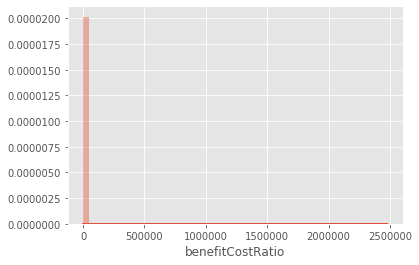

In [25]:
sns.distplot(df['benefitCostRatio'])

## Vizualizations

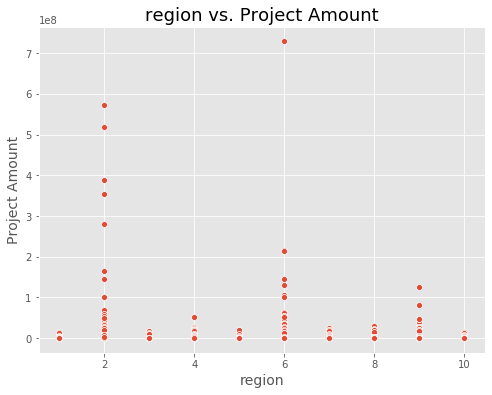

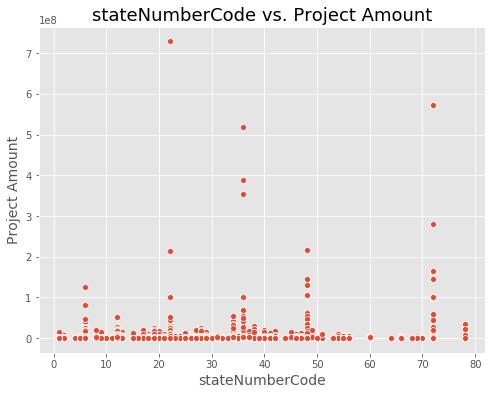

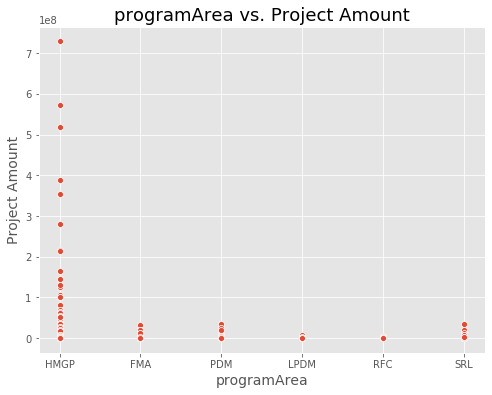

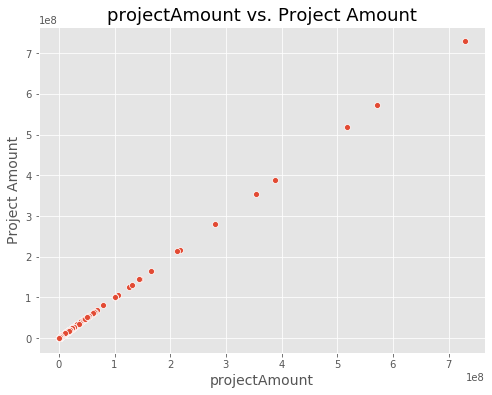

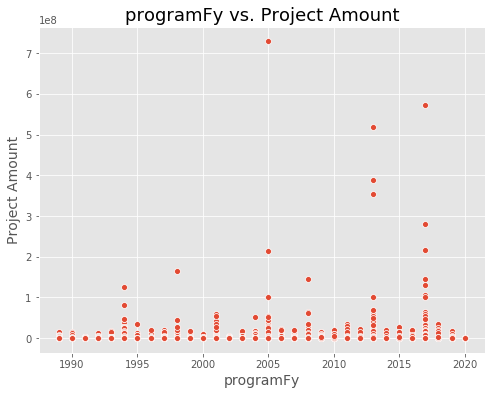

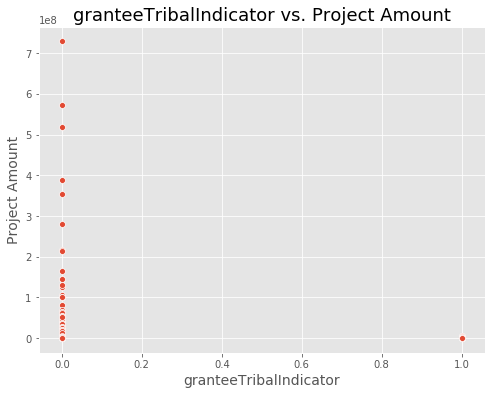

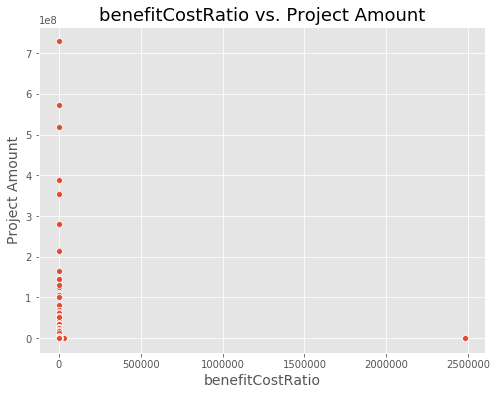

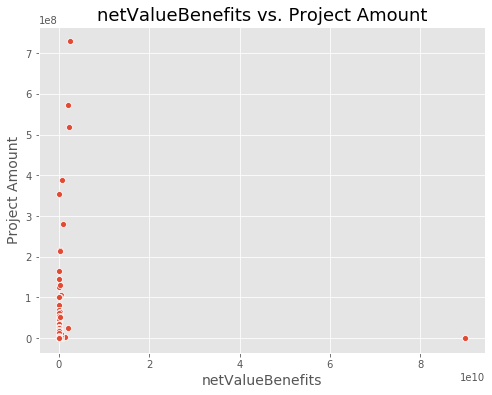

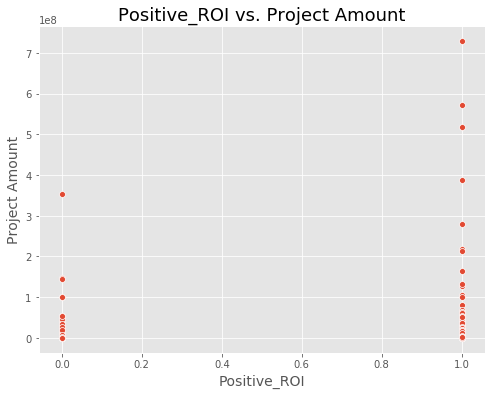

In [26]:
def scatterplot(col):
    ax = plt.figure(figsize = (8,6))
    ax = sns.scatterplot(x = df[col], y = df['projectAmount'])
    ax.set_title('{} vs. Project Amount'.format(col), fontsize = 18)
    ax.set_xlabel('{}'.format(col), fontsize = 14)
    ax.set_ylabel('Project Amount', fontsize = 14);

for col in df:

    scatterplot(col)

In [27]:
# Plotting Price with the categories:
def categorical_plots(df):
    for col in df.select_dtypes('category'):
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=col, y='projectAmount', data=df, palette="colorblind")
        ax.set_title(f"{col} vs projectAmount", fontsize=30)
        plt.xticks(rotation=45)
        plt.show()

In [28]:
categorical_plots(df)

As we can see from the following vizuals above SRL () are the most costly hazard mitigation area that is being spent on

# EDA Raw Data

In [29]:
df.region.value_counts()

4     8408
6     4163
5     2611
9     2496
7     2430
2     2163
3     2021
1     1964
8     1882
10    1438
Name: region, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29576 entries, 0 to 29627
Data columns (total 9 columns):
region                    29576 non-null int64
stateNumberCode           29576 non-null int64
programArea               29576 non-null object
projectAmount             29576 non-null int64
programFy                 29576 non-null int64
granteeTribalIndicator    29576 non-null float64
benefitCostRatio          29576 non-null int64
netValueBenefits          29576 non-null int64
Positive_ROI              29576 non-null int32
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 2.1+ MB


In [31]:
df.stateNumberCode.value_counts()

12    2633
6     1858
1     1646
48    1232
22    1155
40    1153
19     997
13     940
36     842
28     842
34     839
21     735
37     725
46     615
42     596
53     590
39     542
29     539
27     527
55     522
51     511
38     504
5      472
31     456
45     453
50     448
20     438
47     434
25     433
26     417
54     384
17     372
41     369
72     353
23     349
24     339
33     337
8      270
2      267
9      265
30     265
18     231
16     212
4      162
35     151
10     144
49     143
44     132
78     129
15     112
32     109
56      85
69      82
66      75
11      47
60      45
64      39
68       7
70       7
Name: stateNumberCode, dtype: int64

In [32]:
# Very important category as it shows why the mitigation is being done
df.programArea.value_counts()

HMGP    22497
PDM      3906
FMA      2581
LPDM      253
SRL       241
RFC        98
Name: programArea, dtype: int64

Text(0.5, 1.0, 'Program Area vs. Project Amount')

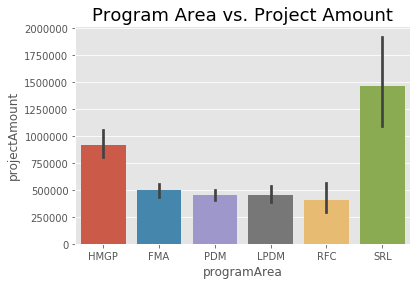

In [33]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

Text(0.5, 1.0, 'Program Area vs. Project Amount')

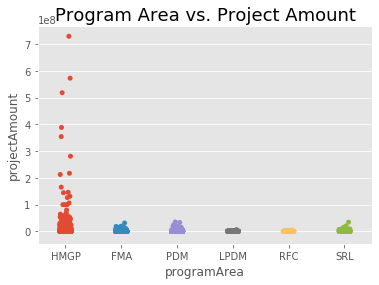

In [34]:
# Add swarmplot on top -its taking a lot of time?
ax = sns.barplot(x="programArea", y="projectAmount", data=df, estimator=np.median)
sns.stripplot(x="programArea", y="projectAmount", data=df)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

In [35]:
# Analysis for visual: 

In [36]:
df.projectAmount.value_counts()

40000      188
50000      185
100000     140
25000      120
20000      120
          ... 
373756       1
140286       1
3200000      1
23553        1
65536        1
Name: projectAmount, Length: 23949, dtype: int64

In [37]:
df.programFy.value_counts()

2011    2311
2017    1949
2005    1860
2008    1681
2013    1370
1998    1290
2009    1285
2010    1244
2007    1187
2004    1182
2016    1116
2001    1059
2003     976
2014     972
2018     937
2015     903
1997     903
1994     900
1996     846
2002     817
2012     662
1999     636
2000     597
2006     595
2019     593
1993     420
1992     369
1995     358
1990     241
1991     172
1989     132
2020      13
Name: programFy, dtype: int64

In [38]:
df.benefitCostRatio.value_counts()

0       14965
1        8400
2        2109
3        1157
4         680
        ...  
56          1
1080        1
105         1
121         1
55          1
Name: benefitCostRatio, Length: 120, dtype: int64

In [39]:
df.netValueBenefits.value_counts()

0          14641
21420        318
1            152
276000        96
552000        36
           ...  
2159860        1
54512          1
7570666        1
683239         1
362649         1
Name: netValueBenefits, Length: 13068, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29576 entries, 0 to 29627
Data columns (total 9 columns):
region                    29576 non-null int64
stateNumberCode           29576 non-null int64
programArea               29576 non-null object
projectAmount             29576 non-null int64
programFy                 29576 non-null int64
granteeTribalIndicator    29576 non-null float64
benefitCostRatio          29576 non-null int64
netValueBenefits          29576 non-null int64
Positive_ROI              29576 non-null int32
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 3.4+ MB


In [41]:
for col in df.columns:
    print(col, df[col].nunique())

region 10
stateNumberCode 59
programArea 6
projectAmount 23949
programFy 32
granteeTribalIndicator 2
benefitCostRatio 120
netValueBenefits 13068
Positive_ROI 2


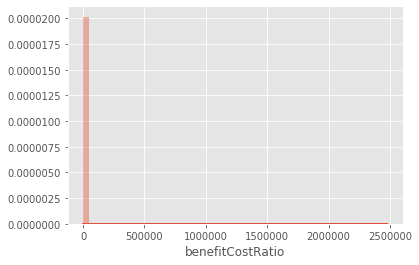

In [42]:
sns.distplot(df['benefitCostRatio'])

**From the distplot we can see that there is a large skew that needs to be addressed. We will further remove the extreme outliers in projectAmount.**

In [43]:
df.shape

(29576, 9)

Text(0.5, 1.0, 'Program Area vs. Project Amount')

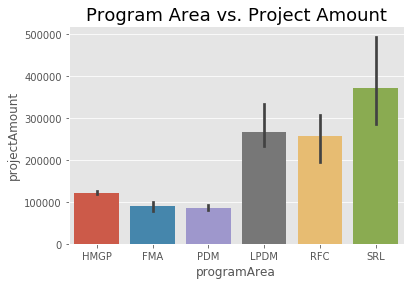

In [44]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df, estimator=np.median)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

Text(0.5, 1.0, 'Tribal Projects Program Amount')

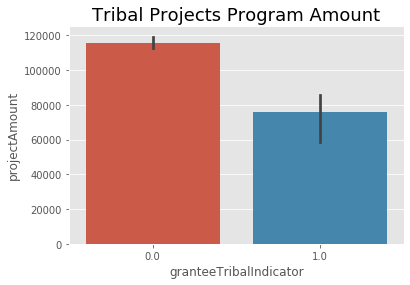

In [45]:
ax = sns.barplot(x="granteeTribalIndicator", y="projectAmount", data=df, estimator=np.median)
ax.set_title('Tribal Projects Program Amount', fontsize = 18)

In [46]:
df['region'] = df['region'].astype('category') 
df['stateNumberCode'] = df['stateNumberCode'].astype('category') 
df['programFy'] = df['programFy'].astype('category')

In [47]:
pd.get_dummies(df)

projectAmount  granteeTribalIndicator  ...  programFy_2019  programFy_2020
0             402910                   0.000  ...               0               0
1             366071                   0.000  ...               0               0
2              96965                   0.000  ...               0               0
3            5932500                   0.000  ...               0               0
4              34245                   0.000  ...               0               0
...              ...                     ...  ...             ...             ...
29623         423000                   0.000  ...               1               0
29624        1708540                   0.000  ...               0               0
29625        2882727                   0.000  ...               1               0
29626          21000                   0.000  ...               1               0
29627          58216                   0.000  ...               1               0

[29576 rows x 112 columns]

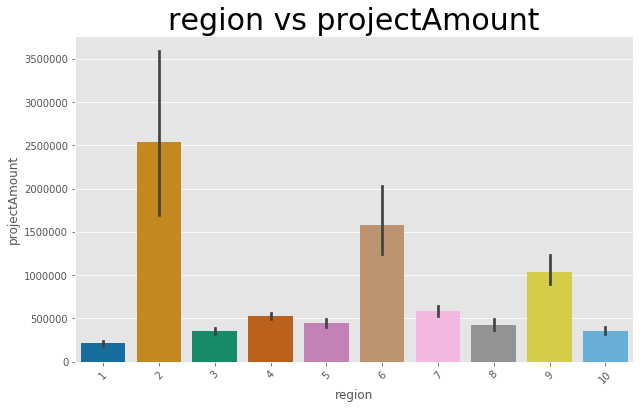

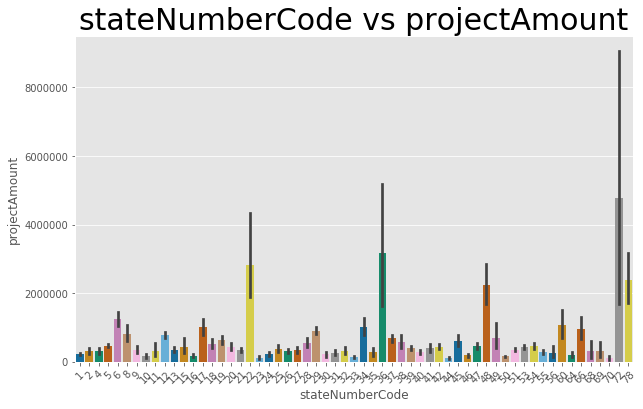

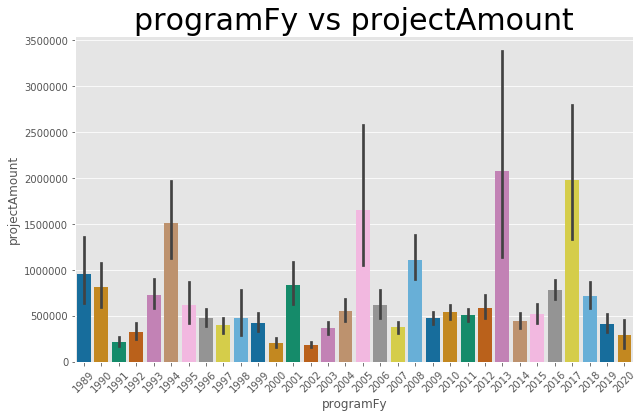

In [48]:
categorical_plots(df)

In [49]:
## Notes: We could use these categorical plots in PP to show raw data information

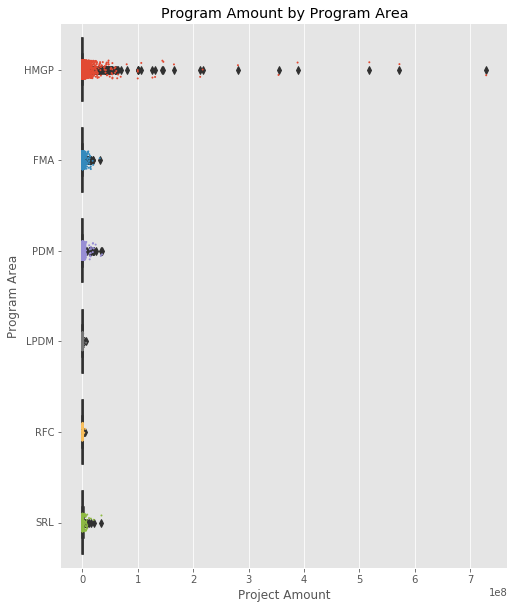

In [50]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="projectAmount", y="programArea", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="projectAmount", y="programArea", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Area")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Program Area")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [51]:
## Notes: 

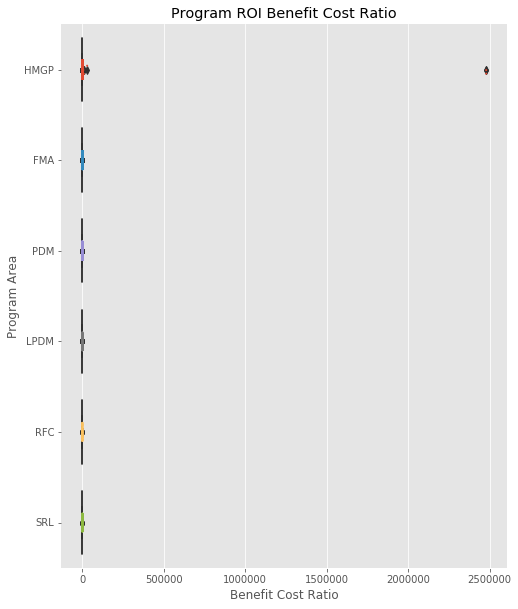

In [52]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="benefitCostRatio", y="programArea", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="benefitCostRatio", y="programArea", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Area")
ax.set(xlabel="Benefit Cost Ratio")
ax.set(title="Program ROI Benefit Cost Ratio")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [53]:
## Notes: Extreme values in HMGP

In [54]:
# The outliers need to be addressed
df = df[(df['benefitCostRatio']<5000)]

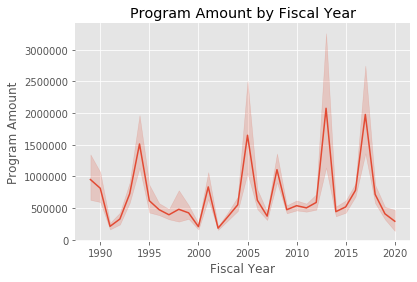

In [55]:
ax = sns.lineplot(x="programFy", y="projectAmount",
             data=df)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Amount")
ax.set(xlabel="Fiscal Year")
ax.set(title="Program Amount by Fiscal Year")
sns.despine(left=True)

In [56]:
## Notes: Spikes in 2013 & 2016

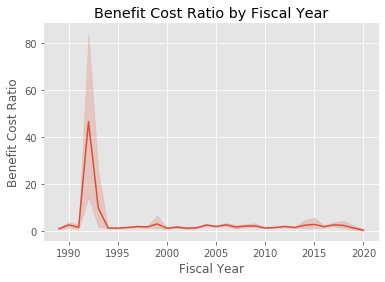

In [57]:
ax = sns.lineplot(x="programFy", y="benefitCostRatio",
             data=df)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Benefit Cost Ratio")
ax.set(xlabel="Fiscal Year")
ax.set(title="Benefit Cost Ratio by Fiscal Year")
sns.despine(left=True)

In [58]:
## Notes: Ben Cost Ratio spike in 1993? Unsure why but interesting that it stays low after that

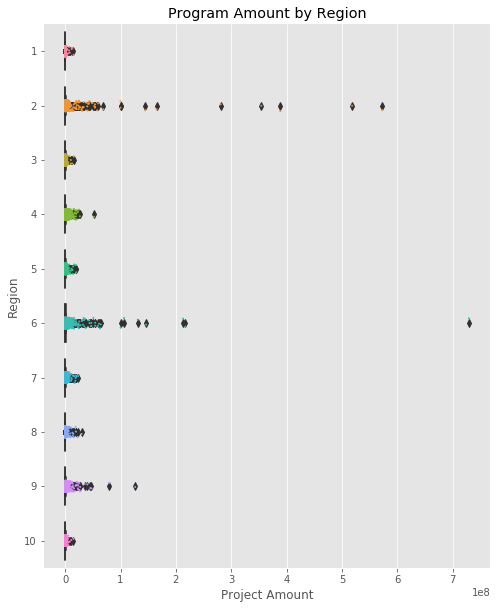

In [59]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="projectAmount", y="region", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="projectAmount", y="region", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Region")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Region")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [60]:
## Notes: Extreme values in regions 6, 2, 8

In [61]:
#sns.distplot(x='projectAmount, col="Positive_ROI", kde=True)

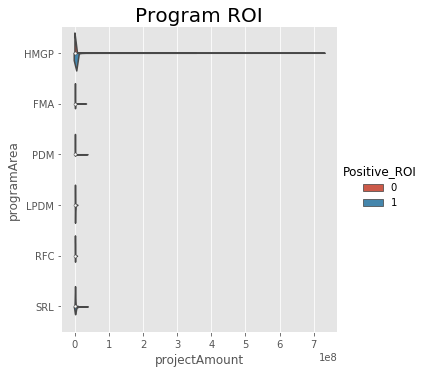

In [62]:
ax = sns.catplot(x="projectAmount", y="programArea", hue="Positive_ROI",
            kind="violin", split=True, pallete="colorblind", data=df)
plt.title('Program ROI', fontsize=(20))
plt.show()

In [63]:
## Notes: Violin plot may not be best to visualize Program ROI

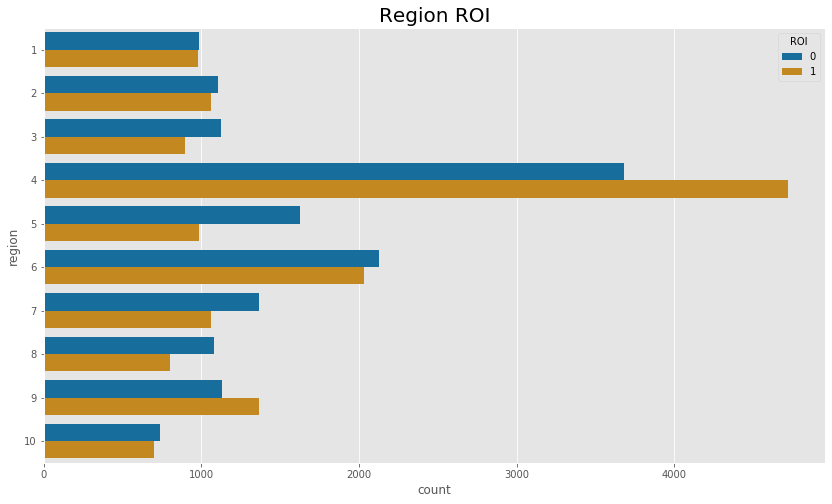

In [64]:
#Plot region vs. ROI
plt.figure(figsize=(14, 8))
ax = sns.countplot(y=df['region'], hue=df['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
ax.legend(title="ROI")
plt.title('Region ROI', fontsize=(20))
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [65]:
## Notes: Region 4 has most program counts
# Let's turn this sideways

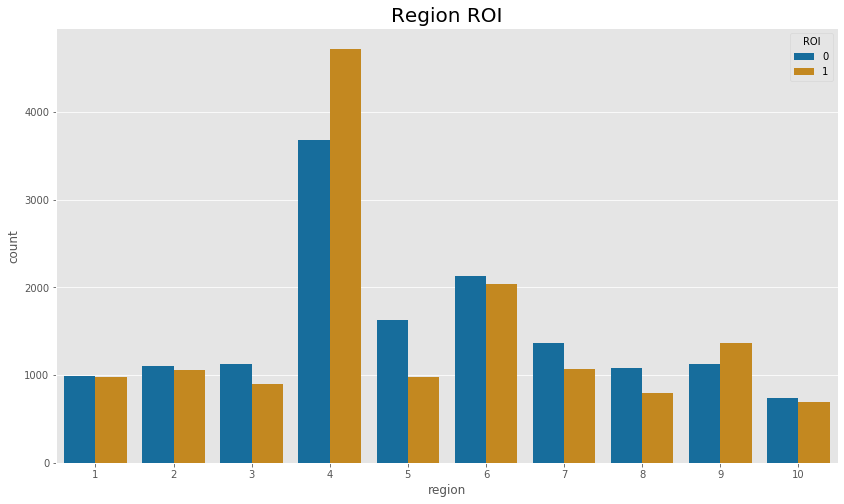

In [66]:
#Plot region vs. ROI
plt.figure(figsize=(14, 8))
ax = sns.countplot(x=df['region'], hue=df['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
ax.legend(title="ROI")
plt.title('Region ROI', fontsize=(20))
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [67]:
## Notes: Much easier to see the results
# Add to PP

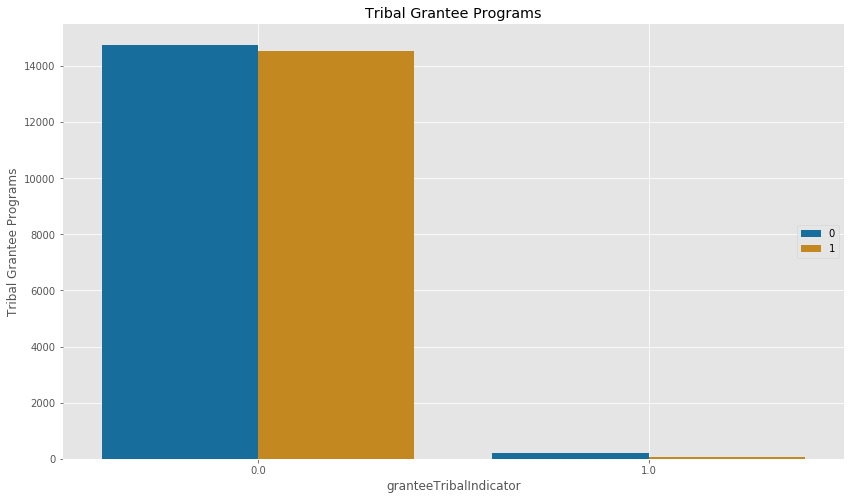

In [68]:
# Plot tribal indicator projects vs. ROI
plt.figure(figsize=(14, 8))
ax = sns.countplot(x=df['granteeTribalIndicator'], hue=df['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Tribal Grantee Programs")
ax.set(title="Tribal Grantee Programs")
sns.despine(left=True)
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [69]:
## Note this shows us the data viz for tribal groups but not many programs in tribal so hard to vizualize

In [70]:
# Dropping the tribal indicator as there aren't 
# that many tribal projects in our dataset to use for modeling
df.drop(columns=['granteeTribalIndicator'], inplace=True)

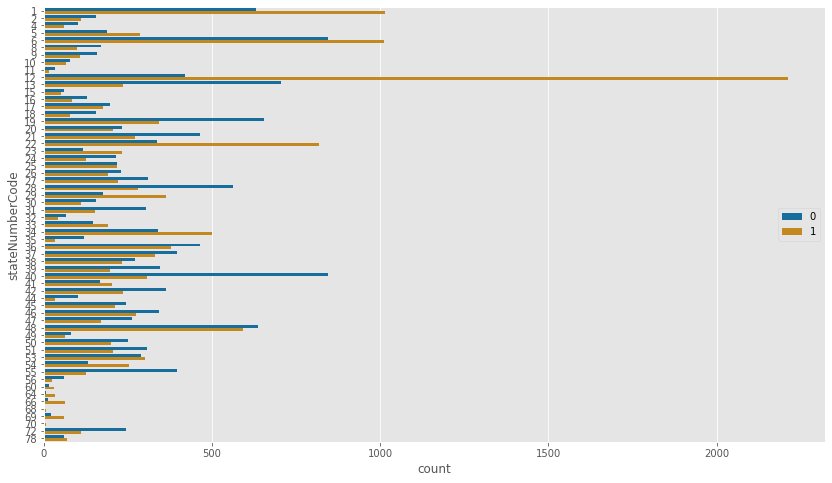

In [71]:
#Plot stateNumberCode vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df['stateNumberCode'], hue=df['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [72]:
# It is very hard to viz the states information as there are many.
# A map would be good to make to viz this

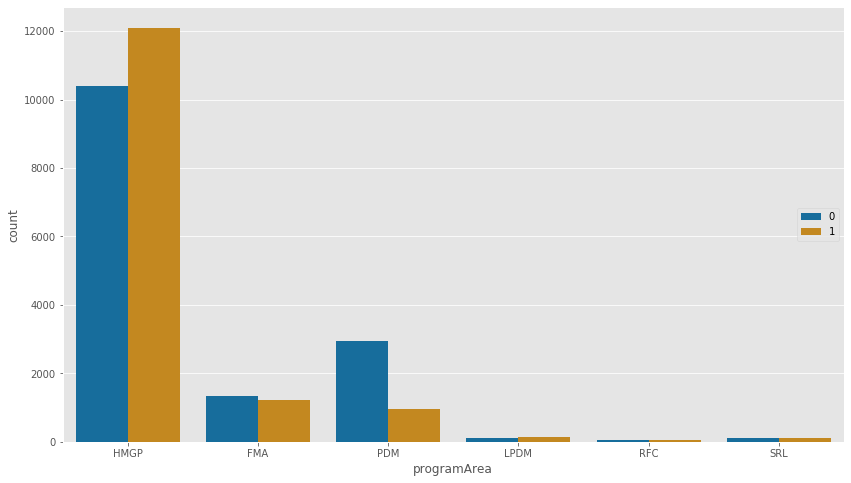

In [77]:
#Plot programArea vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='programArea', hue='Positive_ROI', palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [78]:
## Notes: Need to come back to find out the issue on this

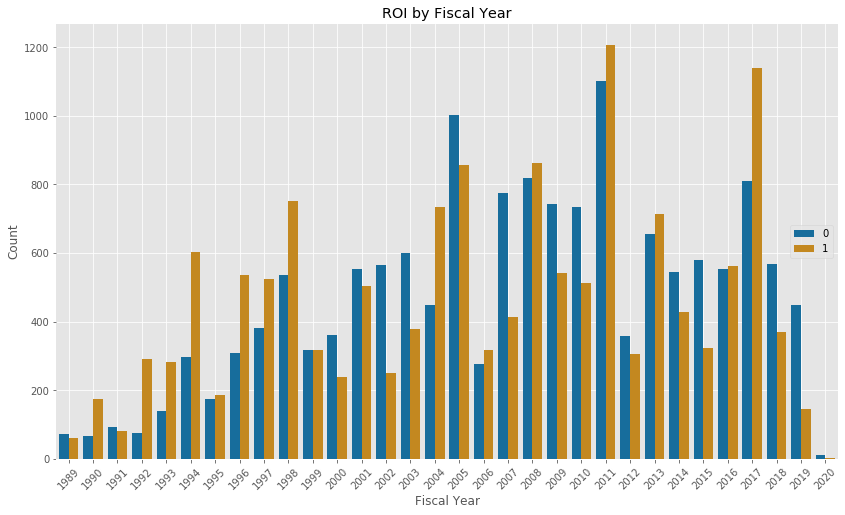

In [79]:
#Plot programFy vs. ROI
plt.figure(figsize=(14, 8))
ax = sns.countplot(x=df['programFy'], hue=df['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.xticks(rotation=45)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Count")
ax.set(xlabel="Fiscal Year")
ax.set(title="ROI by Fiscal Year")
sns.despine(left=True)

plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [80]:
# This vizual can show us the trends in ROI over fiscal year
# Use for PP

# Outlier Removal

In [81]:
# After researching outlier removal 
# and exploring our data it is best to do IQR type outlier removal methods

def outliersiqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = iqr * 1.5
    outliers = (data < q1 - threshold) | (data > q3 + threshold)
    outliers = pd.Series(outliers, index=data.index)
    return outliers

In [82]:
# Function to make an outlier column which we will then remove outliers from
def outlierscolumn(df, columns, verbose=True):
    new_df = df.copy()
    for col in columns:
        outliers = outliersiqr(new_df[col])
        if verbose:
            print(f'{outliers.sum()} outliers found in {col}')
        new_df[f'{col}_outliers'] = outliers
    return new_df

In [83]:
# Feeding in the numerical columns for identifying outliers
num_cols = list(df.select_dtypes('number').columns)

# Saving the new dataframe with outlier columns added
df2 = outlierscolumn(df, num_cols)

3833 outliers found in projectAmount
4097 outliers found in benefitCostRatio
4557 outliers found in netValueBenefits
0 outliers found in Positive_ROI


In [84]:
df2.head()

region stateNumberCode  ... netValueBenefits_outliers  Positive_ROI_outliers
0      6              48  ...                      True                  False
1      5              18  ...                     False                  False
2      7              19  ...                     False                  False
3      2              36  ...                     False                  False
4      7              19  ...                     False                  False

[5 rows x 12 columns]

In [85]:
# Creating a list of the outlier columns
outliercols = []
for col in df2.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['projectAmount_outliers',
 'benefitCostRatio_outliers',
 'netValueBenefits_outliers',
 'Positive_ROI_outliers']

In [86]:
# Filtering the outliers out of my dataframe and returning only the entries
# that are not outliers for any of the features
for col in outliercols:
    df2 = df2[(df2[col]==False)]
df2.shape

(21860, 12)

In [87]:
# Dropping the outlier columns that were added
for col in outliercols:
    df2.drop(columns=[col], axis=1, inplace=True)

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21860 entries, 1 to 29627
Data columns (total 8 columns):
region              21860 non-null category
stateNumberCode     21860 non-null category
programArea         21860 non-null object
projectAmount       21860 non-null int64
programFy           21860 non-null category
benefitCostRatio    21860 non-null int64
netValueBenefits    21860 non-null int64
Positive_ROI        21860 non-null int32
dtypes: category(3), int32(1), int64(3), object(1)
memory usage: 1008.2+ KB


In [89]:
df=df2

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21860 entries, 1 to 29627
Data columns (total 8 columns):
region              21860 non-null category
stateNumberCode     21860 non-null category
programArea         21860 non-null object
projectAmount       21860 non-null int64
programFy           21860 non-null category
benefitCostRatio    21860 non-null int64
netValueBenefits    21860 non-null int64
Positive_ROI        21860 non-null int32
dtypes: category(3), int32(1), int64(3), object(1)
memory usage: 1008.2+ KB


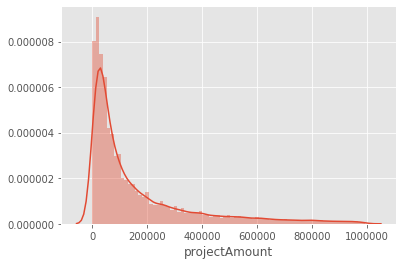

In [91]:
sns.distplot(df['projectAmount'], bins='auto')

In [92]:
df.shape

(21860, 8)

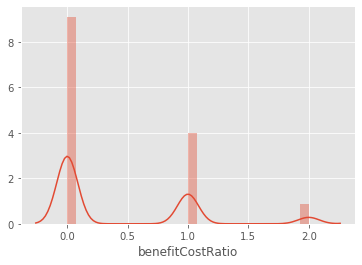

In [93]:
sns.distplot(df['benefitCostRatio'])

In [94]:
# We've now removed all of the extreme outliers in benefit cost ratio

# EDA After Outlier Removal

Text(0.5, 1.0, 'Program Area vs. Project Amount')

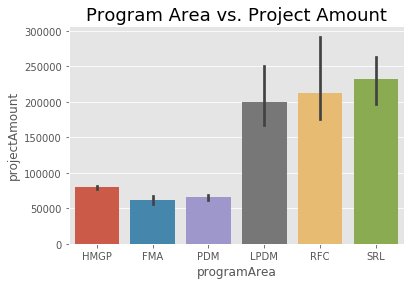

In [95]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df, estimator=np.median)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

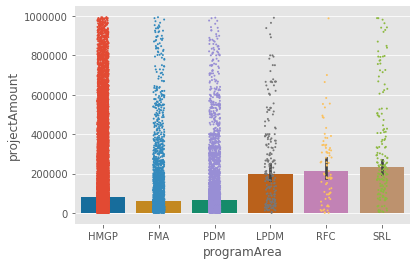

In [96]:
# Initialize the figure with a logarithmic x axis
#f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.barplot(y="projectAmount", x="programArea", data=df,
            palette="colorblind", estimator=np.median)

# Add in points to show each observation
sns.stripplot(y="projectAmount", x="programArea", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Area")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Program Area")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [97]:
## Note: This is a start on this vizual but very hard to vizualize with the points there
# Will try to get the swarmplot to work

[Text(0.5, 1.0, 'Program ROI Benefit Cost Ratio')]

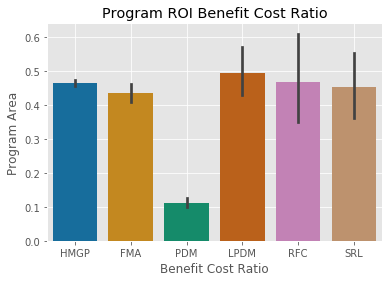

In [98]:
# Plot the orbital period with horizontal boxes
ax = sns.barplot(y="benefitCostRatio", x="programArea", data=df,
            palette="colorblind")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Area")
ax.set(xlabel="Benefit Cost Ratio")
ax.set(title="Program ROI Benefit Cost Ratio")
#sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [99]:
## Note: Need to add in the median line

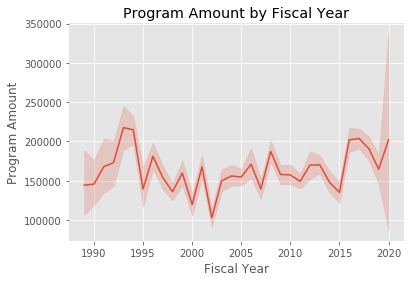

In [100]:
ax = sns.lineplot(x="programFy", y="projectAmount",
             data=df)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Amount")
ax.set(xlabel="Fiscal Year")
ax.set(title="Program Amount by Fiscal Year")
sns.despine(left=True)

In [101]:
## Note: Amount by year
# Will add to PP
# Question from James about light red area

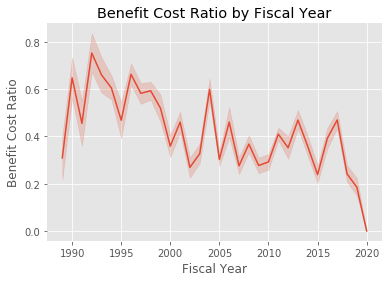

In [102]:
ax = sns.lineplot(x="programFy", y="benefitCostRatio",
             data=df)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Benefit Cost Ratio")
ax.set(xlabel="Fiscal Year")
ax.set(title="Benefit Cost Ratio by Fiscal Year")
sns.despine(left=True)

In [103]:
## Note: Benefit Cost Ratio goes down after 2016
# Will add to PP

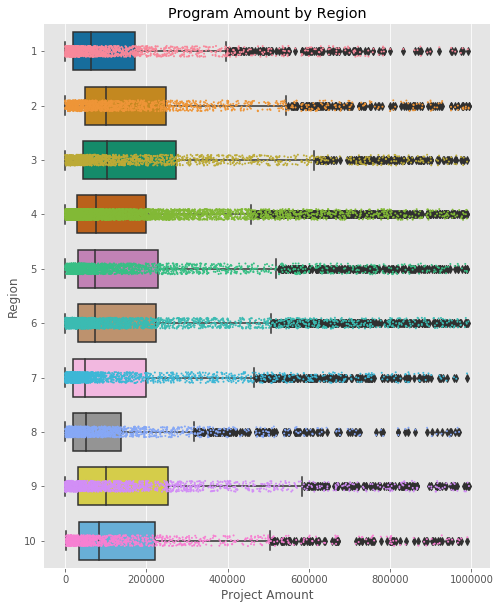

In [104]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="projectAmount", y="region", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="projectAmount", y="region", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Region")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Region")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [105]:
## Note: May ve nire helpful to see this vizual with a bar and swarm plot

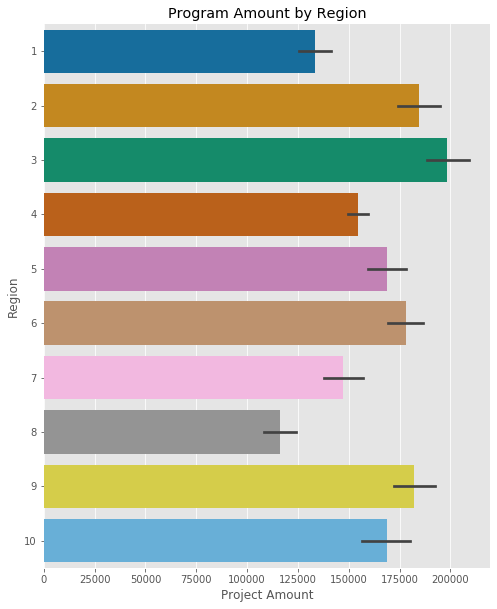

In [107]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.barplot(x="projectAmount", y="region", data=df,
            palette="colorblind")

# Add in points to show each observation
#sns.swarmplot(x="projectAmount", y="region", data=df,
               #size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Region")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Region")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [108]:
## Note: Takes a very long time to load but should distribution withouth covering up our barplot too much
# Will add to PP

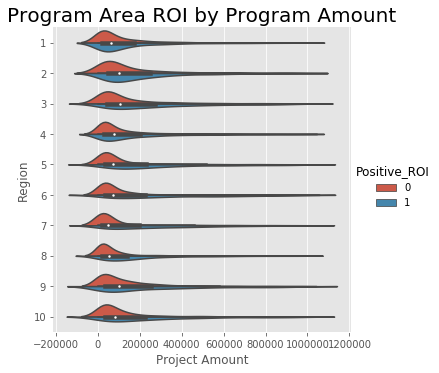

In [109]:
ax = sns.catplot(x="projectAmount", y="region", hue="Positive_ROI",
            kind="violin", split=True, pallete="colorblind", data=df)
plt.title('Program Area ROI by Program Amount', fontsize=(20))

# Tweak the visual presentation
ax.set(ylabel="Region")
ax.set(xlabel="Project Amount")
sns.despine(left=True)

plt.show()

In [110]:
## Note: We will also want to make this in case we want to use but the barplot/swarmplot if possible

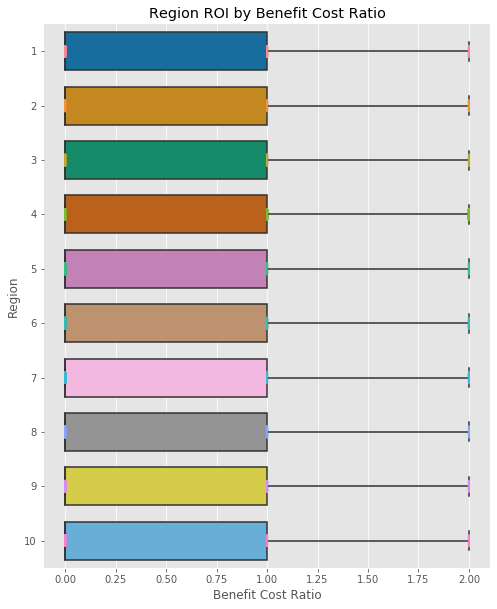

In [111]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="benefitCostRatio", y="region", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="benefitCostRatio", y="region", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Region")
ax.set(xlabel="Benefit Cost Ratio")
ax.set(title="Region ROI by Benefit Cost Ratio")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [112]:
## Note: Something is going wrong here that I need to figure out why
# The reason for this may be because the benefit cost ratio is binned to be from 0, 1, 2

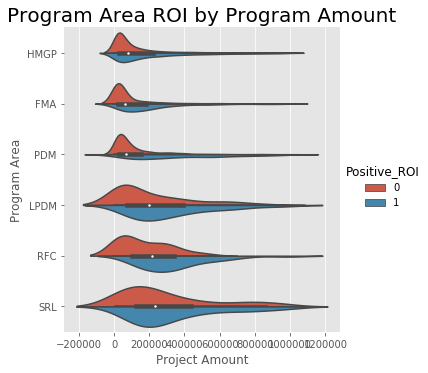

In [113]:
ax = sns.catplot(x="projectAmount", y="programArea", hue="Positive_ROI",
            kind="violin", split=True, pallete="colorblind", data=df)
plt.title('Program Area ROI by Program Amount', fontsize=(20))

# Tweak the visual presentation
ax.set(ylabel="Program Area")
ax.set(xlabel="Project Amount")
sns.despine(left=True)

plt.show()

In [114]:
## Violin plot may not be best to convey the message, we will try to make bar/swarm

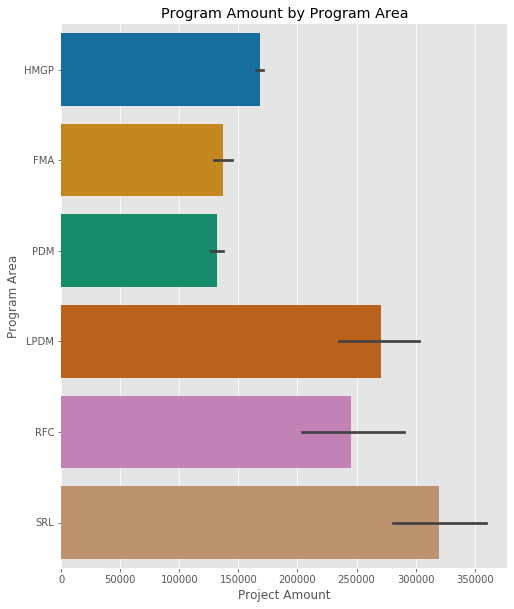

In [116]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.barplot(x="projectAmount", y="programArea", data=df,
            palette="colorblind")

# Add in points to show each observation
#sns.swarmplot(x="projectAmount", y="programArea", data=df,
             # size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Area")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Program Area")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

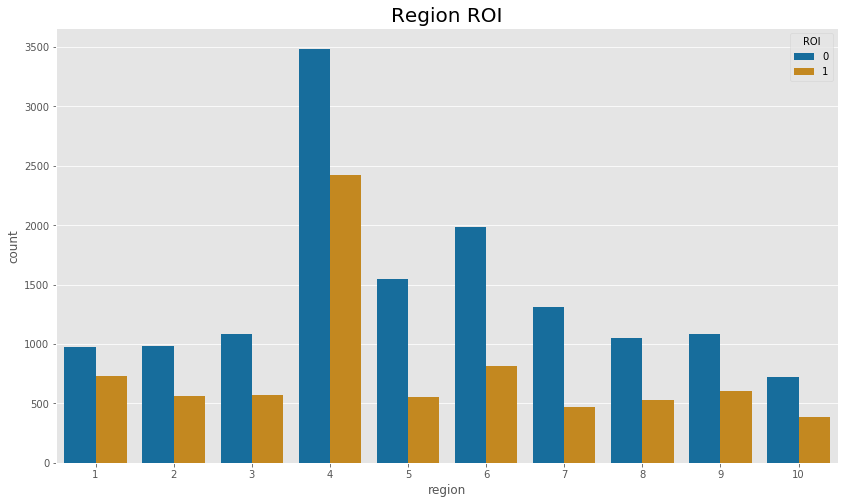

In [117]:
#Plot region vs. ROI
plt.figure(figsize=(14, 8))
ax = sns.countplot(x=df2['region'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
ax.legend(title="ROI")
plt.title('Region ROI', fontsize=(20))
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

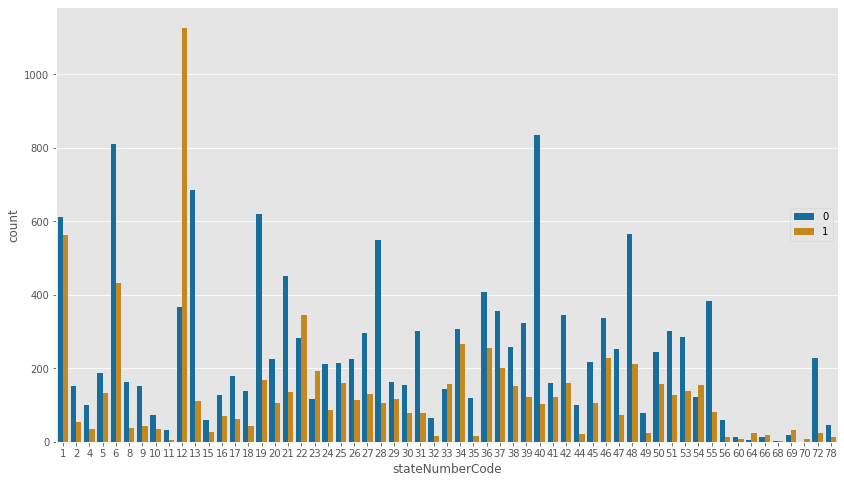

In [118]:
#Plot stateNumberCode vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(x=df2['stateNumberCode'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

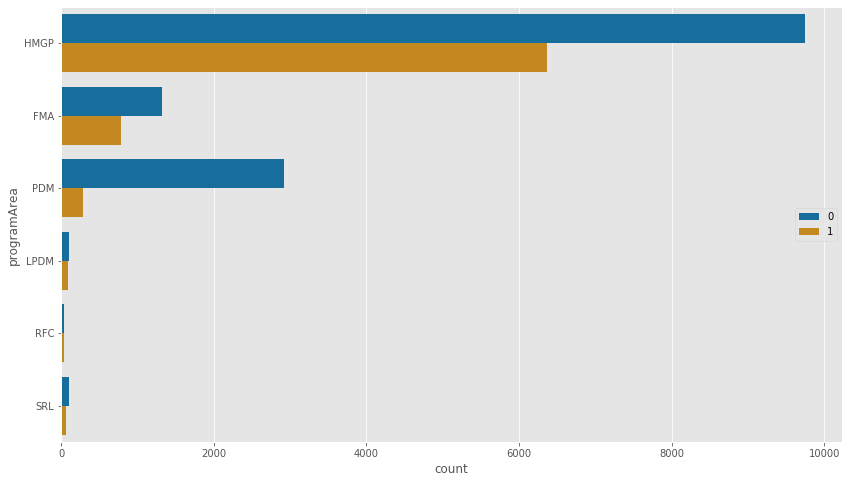

In [119]:
#Plot programArea vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(data=df2, y='programArea', hue='Positive_ROI', palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

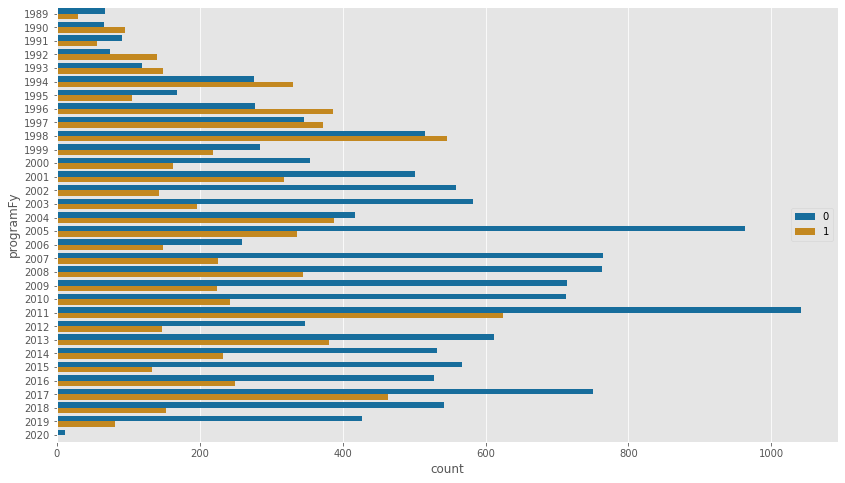

In [120]:
#Plot programFy vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df2['programFy'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [121]:
# The outliers need to be addressed
df = df[(df['projectAmount']<500000)]

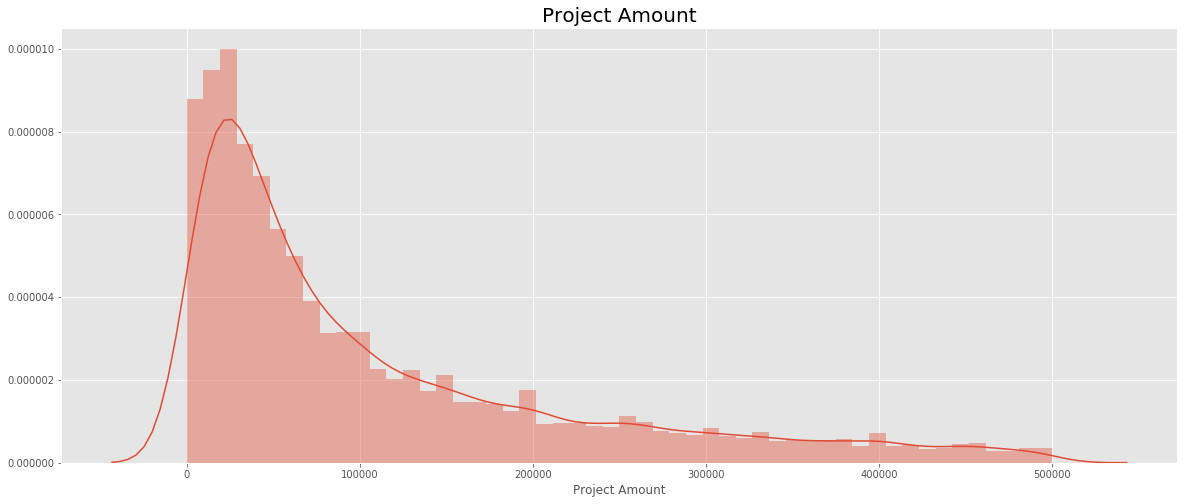

In [122]:
plt.figure(figsize=(20, 8))
ax = sns.distplot(df['projectAmount'], bins='auto')
plt.title('Project Amount', fontsize=(20))
ax.set(xlabel="Project Amount")
plt.show()

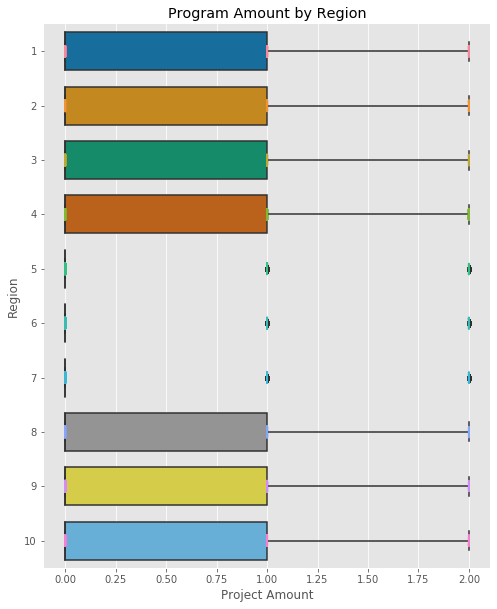

In [123]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="benefitCostRatio", y="region", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="benefitCostRatio", y="region", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Region")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Region")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [124]:
df = pd.get_dummies(df)

In [125]:
df.drop(columns=['benefitCostRatio'], inplace=True)

In [126]:
df.head()

projectAmount  netValueBenefits  ...  programFy_2019  programFy_2020
1          366071            961452  ...               0               0
2           96965                 0  ...               0               0
4           34245                 0  ...               0               0
9           25609                 0  ...               0               0
10         109900            108817  ...               0               0

[5 rows x 110 columns]

# Logistic Model #1

### Supervised Machine Learning Algorithm that can be used for Classification or Regression. Used to predict the categorical dependent variable with the help of independent variables.

In [127]:
#Split features and target
X = df.drop(columns=['Positive_ROI'], axis=1)
y = df['Positive_ROI']

# Normalizing the data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
#Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
#Create function to easily build models and display results
def build_model(classifier, X_train, X_test, y_train,  y_test):
    '''Build classification model, returning classification report, train and test accuracy, and confusion matrix.
    
    Keyword arguments: 
    classifier -- classification algorithm
    predictors -- X, features
    labels -- y, target
    '''
    
    #Create variables that can be called outside function
    #build_model.X_train = X_train
    #build_model.X_test = X_test
    #build_model.y_train = y_train
    #build_model.y_test = y_test
    
    #Fit model
    classifier.fit(X_train, y_train)
    #score = np.mean(cross_val_score(classifier, X, y, cv=5, scoring='recall'))

    #Create predictions
    y_hat_train = classifier.predict(X_train)
    y_hat_test = classifier.predict(X_test)
    
    #Create variables that can be called outside function
    #build_model.y_hat_train = y_hat_train
    #build_model.y_hat_test = y_hat_test
    
    #Print classification report
    print('Train Classification Report\n', classification_report(y_train, y_hat_train))
    print('Test Classification Report\n', classification_report(y_test, y_hat_test))
    
    print('Train Accuracy:', round(accuracy_score(y_train, y_hat_train), 3))
    print('Test Accuracy:', round(accuracy_score(y_test, y_hat_test), 3))
    #print('Cross Validation Recall', round(score, 3))
    
    #Create a results dataframe
    #results = pd.DataFrame([[str(model), round(accuracy_score(y_train, y_hat_train), 3), 
     #                        round(accuracy_score(y_test, y_hat_test), 3), round(score, 3)]], 
      #                    columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'Cross_Val_Recall'])
    #build_model.results = results
    
    #Plot Confusion Matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
    plot_confusion_matrix(classifier, X_train, y_train,
                     cmap=plt.cm.Blues, ax=axes[0], normalize='true')
    fig.suptitle('Train & Test Confusion Matrices', fontsize=16);
    
    plot_confusion_matrix(classifier, X_test, y_test,
                     cmap=plt.cm.Blues, ax=axes[1], normalize='true')
    plt.subplots_adjust(wspace=0.4)
    return classifier    

Train Classification Report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     10837
           1       0.96      0.88      0.92      5127

    accuracy                           0.95     15964
   macro avg       0.95      0.93      0.94     15964
weighted avg       0.95      0.95      0.95     15964

Test Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      2682
           1       0.96      0.86      0.91      1310

    accuracy                           0.94      3992
   macro avg       0.95      0.92      0.93      3992
weighted avg       0.94      0.94      0.94      3992

Train Accuracy: 0.95
Test Accuracy: 0.941


LogisticRegression()

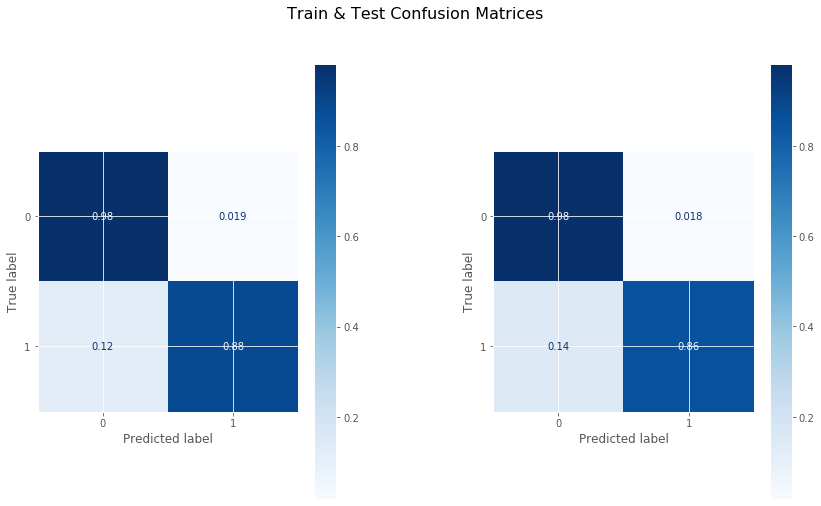

In [129]:
log_reg = LogisticRegression()
build_model(log_reg, X_train, X_test, y_train,  y_test)

## Results:
- Train Accuracy: 0.946
- Test Accuracy: 0.944

In [130]:
features = '+'.join(df.drop('Positive_ROI', axis = 1).columns)
formula = 'Positive_ROI ~' + features
model1 = smf.ols(formula, df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Positive_ROI   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     199.7
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:08:47   Log-Likelihood:                -6399.2
No. Observations:               19956   AIC:                         1.299e+04
Df Residuals:                   19859   BIC:                         1.376e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1698      0.009     19.165      0.000       0.152       0.187
projectAmount      -1.465e-07   2.44e-08     -6.013      0.000   -1.94e-07   -9.87e-08
netValueBenefits    1.245e-06   1.31e-08     94.808      0.000    1.22e-06    1.27e-06
region_1               0.0931      0.008     11.926      0.000       0.078       0.108
region_2               0.0141      0.011      1.267      0.205      -0.008       0.036
region_3              -0.0095      0.010     -0.920      0.358      -0.030       0.011
region_4               0.0190      0.005      3.462      0.001       0.008       0.030
region_5              -0.0323      0.007     -4.494      0.000      -0.046      -0.018
region_6              -0.0244      0.007     -3.338      0.001      -0.039      -0.010
region_7              -0.0409      0.008     -5.427      0.000      -0.056      -0.026
region_8               0.0120      0.009      1.301      0.193      -0.006       0.030
region_9               0.1149      0.020      5.623      0.000       0.075       0.155
region_10              0.0239      0.009      2.781      0.005       0.007       0.041
stateNumberCode_1      0.1904      0.011     18.031      0.000       0.170       0.211
stateNumberCode_2     -0.0094      0.021     -0.452      0.652      -0.050       0.031
stateNumberCode_4     -0.1237      0.035     -3.520      0.000      -0.193      -0.055
stateNumberCode_5      0.0287      0.018      1.563      0.118      -0.007       0.065
stateNumberCode_6     -0.1311      0.025     -5.311      0.000      -0.180      -0.083
stateNumberCode_8     -0.0787      0.023     -3.446      0.001      -0.123      -0.034
stateNumberCode_9     -0.1203      0.022     -5.385      0.000      -0.164      -0.077
stateNumberCode_10     0.0358      0.029      1.213      0.225      -0.022       0.094
stateNumberCode_11    -0.0669      0.048     -1.381      0.167      -0.162       0.028
stateNumberCode_12     0.2728      0.010     27.499      0.000       0.253       0.292
stateNumberCode_13    -0.1670      0.012    -13.656      0.000      -0.191      -0.143
stateNumberCode_15    -0.1031      0.041     -2.495      0.013      -0.184      -0.022
stateNumberCode_16     0.0601      0.021      2.909      0.004       0.020       0.101
stateNumberCode_17    -0.0607      0.021     -2.949      0.003      -0.101      -0.020
stateNumberCode_18     0.0017      0.024      0.070      0.944      -0.045       0.048
stateNumberCode_19    -0.0231      0.012     -1.887      0.059      -0.047       0.001
stateNumberCode_20     0.0029      0.017      0.173      0.862      -0.030       0.036
stateNumberCode_21    -0.0761      0.014     -5.475      0.000      -0.103      -0.049
stateNumberCode_22     0.1087      0.015      7.284      0.000       0.079       0.138
stateNumberCode_23     0.2092      0.0

In [131]:
model1.params

Intercept           0.170
projectAmount      -0.000
netValueBenefits    0.000
region_1            0.093
region_2            0.014
                    ...  
programFy_2016      0.006
programFy_2017     -0.006
programFy_2018     -0.051
programFy_2019     -0.149
programFy_2020     -0.238
Length: 110, dtype: float64

### We can see that we have some columns/features that are highly correlated including projectAmount, which is used to calculate the Positive ROI and netValueBenefits which has the same issue of correlation. Because of this we will delete these two columns

# Logistic Model #2

In [132]:
df.drop(columns=['projectAmount', 'netValueBenefits'], inplace=True)

In [133]:
df.head()

Positive_ROI  region_1  ...  programFy_2019  programFy_2020
1              1         0  ...               0               0
2              0         0  ...               0               0
4              0         0  ...               0               0
9              0         0  ...               0               0
10             0         0  ...               0               0

[5 rows x 108 columns]

<Figure size 864x432 with 0 Axes>

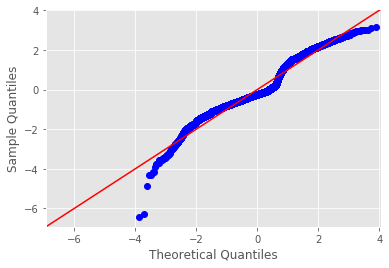

In [134]:
# QQ plot to see if our data is linear
fig1 = plt.figure(figsize = (12,6))
fig1 = sm.graphics.qqplot(model1.resid,fit=True, line='45');

In [135]:
# Coment on qq plot
# R-squared .4

Train Classification Report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     10837
           1       0.96      0.88      0.92      5127

    accuracy                           0.95     15964
   macro avg       0.95      0.93      0.94     15964
weighted avg       0.95      0.95      0.95     15964

Test Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      2682
           1       0.96      0.86      0.91      1310

    accuracy                           0.94      3992
   macro avg       0.95      0.92      0.93      3992
weighted avg       0.94      0.94      0.94      3992

Train Accuracy: 0.95
Test Accuracy: 0.941


LogisticRegression()

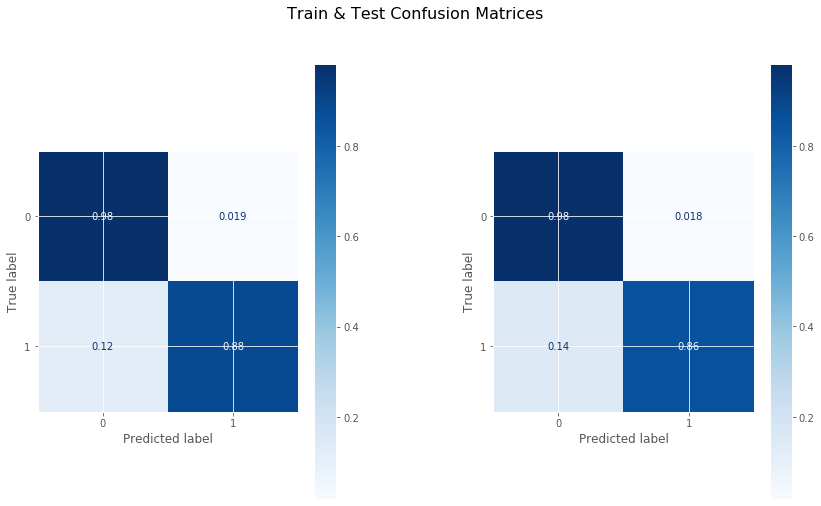

In [136]:
log_reg_2 = LogisticRegression()
build_model(log_reg, X_train, X_test, y_train,  y_test)

In [137]:
features = '+'.join(df.drop('Positive_ROI', axis = 1).columns)
formula = 'Positive_ROI ~' + features
model1 = smf.ols(formula, df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Positive_ROI   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     55.10
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:08:53   Log-Likelihood:                -10829.
No. Observations:               19956   AIC:                         2.185e+04
Df Residuals:                   19861   BIC:                         2.260e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.289e+11   4.31e+11     -1.227      0.220   -1.37e+12    3.16e+11
region_1           -1.425e+11   2.21e+11     -0.646      0.518   -5.75e+11     2.9e+11
region_2            1.278e+12   7.24e+11      1.764      0.078   -1.42e+11     2.7e+12
region_3            -4.04e+11   3.53e+11     -1.146      0.252    -1.1e+12    2.87e+11
region_4            1.467e+11    1.5e+11      0.976      0.329   -1.48e+11    4.41e+11
region_5             -2.5e+11   2.94e+11     -0.852      0.394   -8.26e+11    3.25e+11
region_6             9.64e+11   4.96e+11      1.944      0.052    -8.2e+09    1.94e+12
region_7           -1.291e+12   9.22e+11     -1.400      0.162    -3.1e+12    5.17e+11
region_8            -4.28e+11    3.4e+11     -1.257      0.209    -1.1e+12    2.39e+11
region_9           -1.136e+11   1.56e+11     -0.729      0.466   -4.19e+11    1.92e+11
region_10           2.025e+10   1.26e+11      0.160      0.873   -2.27e+11    2.68e+11
stateNumberCode_1  -1.737e+11   2.03e+11     -0.857      0.391   -5.71e+11    2.24e+11
stateNumberCode_2  -4.723e+10   3.45e+10     -1.371      0.170   -1.15e+11    2.03e+10
stateNumberCode_4    8.66e+10   4.54e+10      1.907      0.057   -2.43e+09    1.76e+11
stateNumberCode_5   -9.91e+11   4.71e+11     -2.102      0.036   -1.92e+12   -6.69e+10
stateNumberCode_6    8.66e+10   4.54e+10      1.907      0.057   -2.43e+09    1.76e+11
stateNumberCode_8    4.01e+11   3.21e+11      1.249      0.212   -2.28e+11    1.03e+12
stateNumberCode_9   1.155e+11   2.38e+11      0.485      0.628   -3.51e+11    5.82e+11
stateNumberCode_10   3.77e+11   3.36e+11      1.124      0.261   -2.81e+11    1.03e+12
stateNumberCode_11   3.77e+11   3.36e+11      1.124      0.261   -2.81e+11    1.03e+12
stateNumberCode_12 -1.737e+11   2.03e+11     -0.857      0.391   -5.71e+11    2.24e+11
stateNumberCode_13 -1.737e+11   2.03e+11     -0.857      0.391   -5.71e+11    2.24e+11
stateNumberCode_15   8.66e+10   4.54e+10      1.907      0.057   -2.43e+09    1.76e+11
stateNumberCode_16 -4.723e+10   3.45e+10     -1.371      0.170   -1.15e+11    2.03e+10
stateNumberCode_17  2.231e+11   2.91e+11      0.766      0.444   -3.48e+11    7.94e+11
stateNumberCode_18  2.231e+11   2.91e+11      0.766      0.444   -3.48e+11    7.94e+11
stateNumberCode_19  1.264e+12   8.71e+11      1.451      0.147   -4.43e+11    2.97e+12
stateNumberCode_20  1.264e+12   8.71e+11      1.451      0.147   -4.43e+11    2.97e+12
stateNumberCode_21 -1.737e+11   2.03e+11     -0.857      0.391   -5.71e+11    2.24e+11
stateNumberCode_22  -9.91e+11   4.71e+11     -2.102      0.036   -1.92e+12   -6.69e+10
stateNumberCode_23  1.155e+11   2.38e+11      0.485      0.628   -3.51e+11    5.82e+11
stateNumberCode_24   3.77e+11   3.36e+11      1.124      0.261   -2.81e+11    1.03e+12
stateNumberCode_25  1.155e+11   2.38e+

In [138]:
model1.params

Intercept        -528882906121.173
region_1         -142510227651.523
region_2         1277610374529.666
region_3         -404037801904.826
region_4          146724582592.394
                        ...       
programFy_2016     35300328318.692
programFy_2017     35300328318.690
programFy_2018     35300328318.590
programFy_2019     35300328318.445
programFy_2020     35300328318.314
Length: 108, dtype: float64

**To note in our first logistic regression model we can see that regions 1, 2, 3, and 4 are the strongest intercepts.**

Train Classification Report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     10837
           1       0.96      0.88      0.92      5127

    accuracy                           0.95     15964
   macro avg       0.95      0.93      0.94     15964
weighted avg       0.95      0.95      0.95     15964

Test Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      2682
           1       0.96      0.86      0.91      1310

    accuracy                           0.94      3992
   macro avg       0.95      0.92      0.93      3992
weighted avg       0.94      0.94      0.94      3992

Train Accuracy: 0.95
Test Accuracy: 0.941


LogisticRegression()

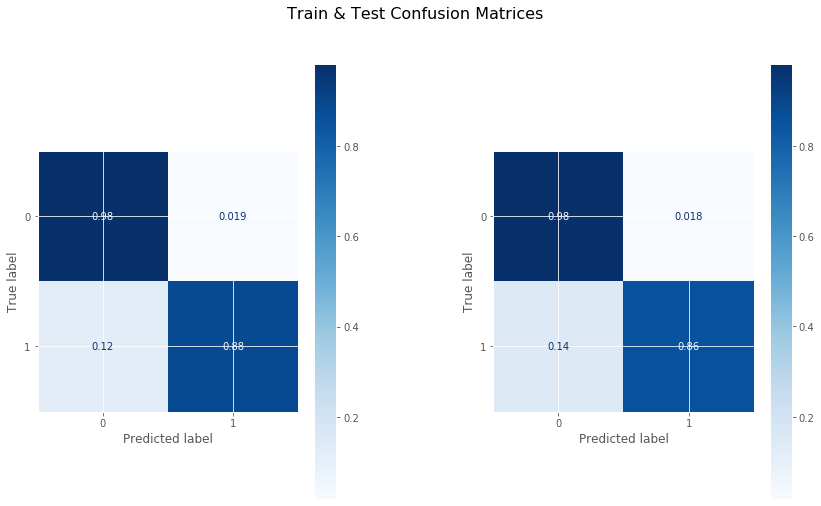

In [139]:
log_reg = LogisticRegression()
build_model(log_reg, X_train, X_test, y_train,  y_test)

**No changes have occurred because the only thing that we have changed is removing two variables that were highly correlated to our target.**

# Baye's Classification Model

## Classifies based on conditional probabilities of finding certain features

Train Classification Report
               precision    recall  f1-score   support

           0       0.92      0.72      0.81     10837
           1       0.60      0.87      0.71      5127

    accuracy                           0.77     15964
   macro avg       0.76      0.79      0.76     15964
weighted avg       0.82      0.77      0.78     15964

Test Classification Report
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      2682
           1       0.59      0.85      0.70      1310

    accuracy                           0.76      3992
   macro avg       0.75      0.78      0.75      3992
weighted avg       0.80      0.76      0.76      3992

Train Accuracy: 0.768
Test Accuracy: 0.756


GaussianNB()

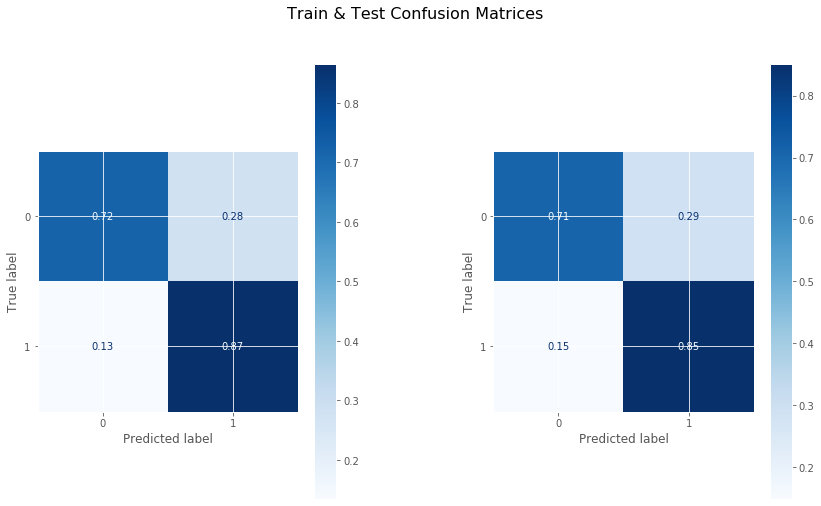

In [140]:
bayesmodel = GaussianNB()
build_model(bayesmodel, X_train, X_test, y_train,  y_test)

# Multinomial Bayes Model

## Classifies based on conditional probabilities, splits based on Gini/entropy


Train Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10837
           1       1.00      1.00      1.00      5127

    accuracy                           1.00     15964
   macro avg       1.00      1.00      1.00     15964
weighted avg       1.00      1.00      1.00     15964

Test Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2682
           1       0.98      0.97      0.97      1310

    accuracy                           0.98      3992
   macro avg       0.98      0.98      0.98      3992
weighted avg       0.98      0.98      0.98      3992

Train Accuracy: 1.0
Test Accuracy: 0.983


DecisionTreeClassifier()

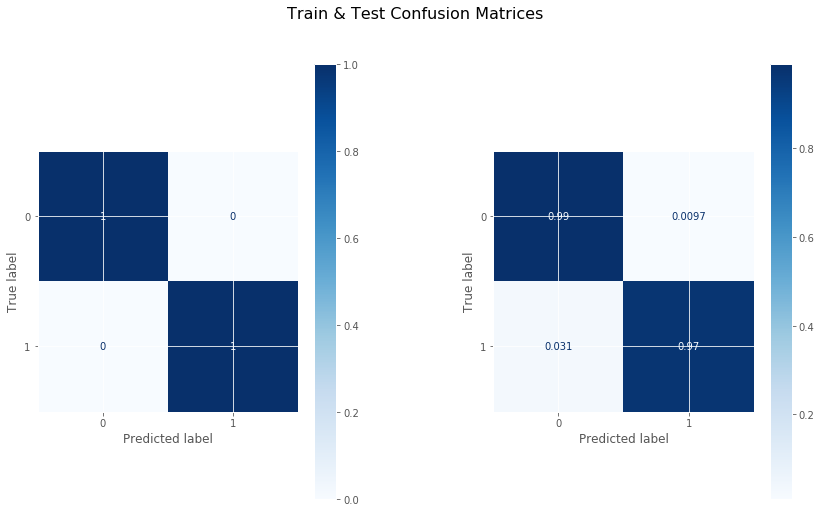

In [141]:
descisionmodel = DecisionTreeClassifier()
build_model(descisionmodel, X_train, X_test, y_train,  y_test)

# Random Forest Model

## Uses multiple decision trees to create a "forest"; each tree uses a random set of sample features

Train Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10837
           1       1.00      1.00      1.00      5127

    accuracy                           1.00     15964
   macro avg       1.00      1.00      1.00     15964
weighted avg       1.00      1.00      1.00     15964

Test Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2682
           1       0.98      1.00      0.99      1310

    accuracy                           0.99      3992
   macro avg       0.99      0.99      0.99      3992
weighted avg       0.99      0.99      0.99      3992

Train Accuracy: 1.0
Test Accuracy: 0.991


RandomForestClassifier()

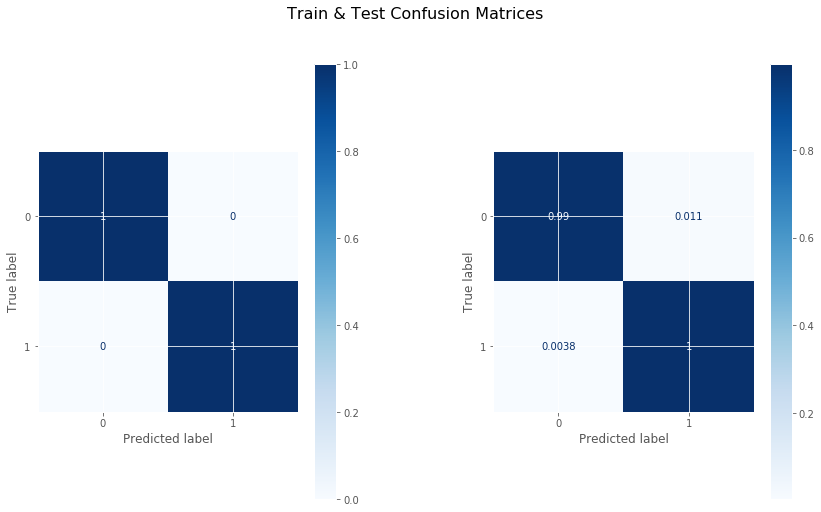

In [142]:
randomforestmodel = RandomForestClassifier()
build_model(randomforestmodel, X_train, X_test, y_train,  y_test)

# XGBoost Model


## Stands for “Extreme Gradient Boosting”. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

Train Classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     10837
           1       0.97      1.00      0.98      5127

    accuracy                           0.99     15964
   macro avg       0.98      0.99      0.99     15964
weighted avg       0.99      0.99      0.99     15964

Test Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2682
           1       0.97      1.00      0.99      1310

    accuracy                           0.99      3992
   macro avg       0.99      0.99      0.99      3992
weighted avg       0.99      0.99      0.99      3992

Train Accuracy: 0.989
Test Accuracy: 0.99


XGBClassifier()

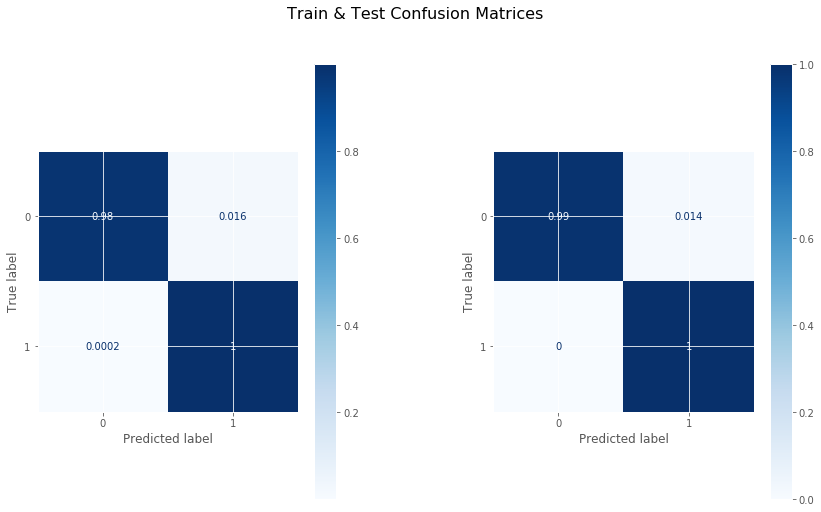

In [143]:
xgboostmodel = xgboost.XGBClassifier()
build_model(xgboostmodel, X_train, X_test, y_train,  y_test)

# Conclusions

- More funds should be allocated to hazard mitigation in all categories as natural disasters and subsequently recovery are increasing

**Less common Natural Disaster Preparedness**

- The costs of COVID-19 surpass all categories of natural disaster recovery costs**

- Volcanoes were second highest cost even though they are less common natural disaster**
